In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append("../src")

In [5]:
from smart_crossover.filehandling import read_results_from_pickle
from smart_crossover.visualization import get_crossover_comparison_df_net, get_total_time_comparison_df_net
from smart_crossover import get_project_root

## OT

In [ ]:
log_dir = get_project_root() / "results" / "logs" / "ot"
results_path = get_project_root() / "results"

In [ ]:
df_ot_cross_2_SE = get_crossover_comparison_df_net(log_dir, results_path, problem='ot', precision=2, pricing='SE')
df_ot_cross_8_SE = get_crossover_comparison_df_net(log_dir, results_path, problem='ot', precision=8, pricing='SE')

In [ ]:
df_ot_cross_2_SE

In [ ]:
df_ot_cross_8_SE

In [ ]:
df_total = get_total_time_comparison_df_net(results_path, precision=2, pricing='PP')

In [ ]:
df_total

In [ ]:
from smart_crossover.visualization import read_results_from_pickle, get_df_from_results_ot

In [ ]:
data = read_results_from_pickle(str(results_path / f"ot_results_total_2_PP.pickle"))
df = get_df_from_results_ot(data, problem='ot')

In [ ]:
df

## MCF

In [ ]:
log_dir = get_project_root() / "results" / "logs" / "mcf"
results_path = get_project_root() / "results"

In [ ]:
df_mcf = get_crossover_comparison_df_net(log_dir, results_path, precision=8, problem='mcf', pricing='SE')

In [ ]:
df_mcf

In [ ]:
import pandas as pd
from scipy.stats.mstats import gmean
def get_mean(df_mcf: pd.DataFrame, mean_type: str = 'geometric') -> pd.DataFrame:
    if mean_type == 'geometric':
        mean_df = pd.DataFrame(gmean(df_mcf, axis=0)).T
    elif mean_type == 'arithmetic':
        mean_df = pd.DataFrame(df_mcf.mean(axis=0)).T
    else:
        raise ValueError('Invalid mean type. Please choose either "geometric" or "arithmetic".')
    mean_df.columns = df_mcf.columns
    return mean_df

df_mean = get_mean(df_mcf, mean_type='geometric')

In [ ]:
df_mean

##

In [1]:
from tabulate import tabulate

In [2]:
print(tabulate(df_mcf, tablefmt='latex', headers='keys', showindex=False))

NameError: name 'df_mcf' is not defined

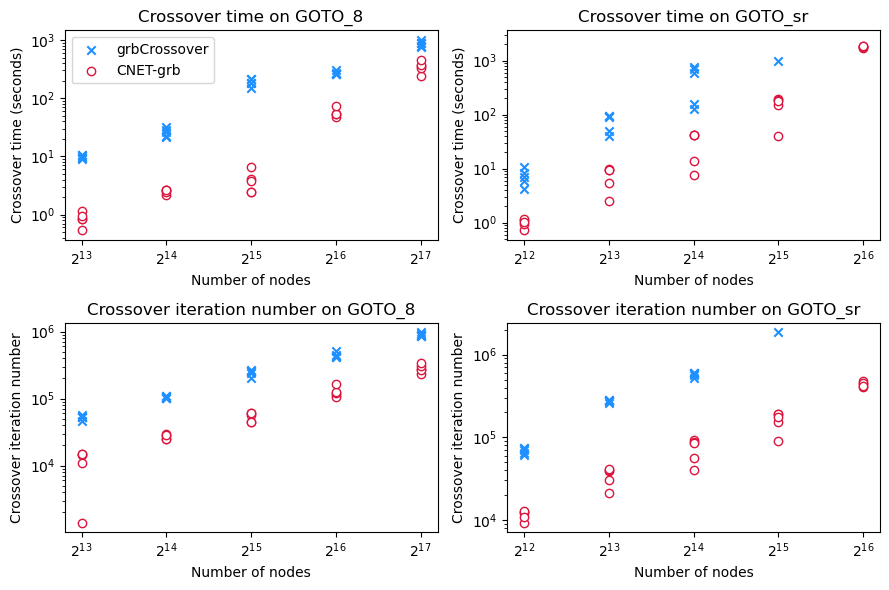

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# the runtime data is entered manually
import numpy as np

data1 = {
    'prob': ['8_13a', '8_13b', '8_13c', '8_13d', '8_13e', '8_14a', '8_14b', '8_14c', '8_14d', '8_14e', '8_15a', '8_15b', '8_15c', '8_15d', '8_15e', '8_16a', '8_16b', '8_16c', '8_16d', '8_16e', '8_17a', '8_17b', '8_17c', '8_17d', '8_17e'],
    'node': [2**13, 2**13, 2**13, 2**13, 2**13, 2**14, 2**14, 2**14, 2**14, 2**14, 2**15, 2**15, 2**15, 2**15, 2**15,2**16, 2**16, 2**16, 2**16, 2**16, 2**17, 2**17, 2**17, 2**17, 2**17],
    'grbCrossover_runtime': np.array([9.18, 9.62, 10.42, 9.53, 10.48, 26.17, 31.39, 21.84, 22.77, 28.15, 209.64, 185.93, 180.61, 152.57, 213.27, 256.75, 255.64, 261.29, 265.76, 300.54, 773.08, 872.61, 796.80, 892.76, 1006.43]),
    'grbCrossover_iterations': np.array([56895, 53017, 45673, 53242, 53550, 108311, 107992, 102828, 100342, 102061, 267968, 262017, 244905, 202674, 262002, 441523, 413308, 422912, 424800, 519098, 883037, 872017, 865727, 916503, 973954]),
    'CNET_runtime': np.array([1.13, 0.85, 0.54, 0.85, 0.93, 2.59, 2.66, 2.21, 2.47, 2.67, 4.07, 3.73, 2.48, 2.44, 6.44, 52.47, 47.15, 53.19, 53.4, 72.13, 241.51, 358.82, 324.32, 364.76, 446.39]),
    'CNET_iterations': np.array([15007, 14448, 11044, 1409, 14943, 27530, 29288, 25294, 25109, 28538, 60136, 57446, 44871, 44258, 60810, 112601, 106872, 122950, 123567, 164305, 234596, 280343, 270919, 307621, 339690]),
}

data2 = {
    'prob': ['sr_12a', 'sr_12b', 'sr_12c', 'sr_12d', 'sr_12e', 'sr_13a', 'sr_13b', 'sr_13c', 'sr_13d', 'sr_13e', 'sr_14a', 'sr_14b', 'sr_14c', 'sr_14d', 'sr_14e', 'sr_15a', 'sr_15b', 'sr_15c', 'sr_15d', 'sr_15e', 'sr_16a', 'sr_16b', 'sr_16c', 'sr_16d', 'sr_16e'],
    'node': [2**12, 2**12, 2**12, 2**12, 2**12, 2**13, 2**13, 2**13, 2**13, 2**13, 2**14, 2**14, 2**14, 2**14, 2**14, 2**15, 2**15, 2**15, 2**15, 2**15,2**16, 2**16, 2**16, 2**16, 2**16],
    'grbCrossover_runtime': np.array([4.13, 8.45, 5.91, 10.95, 6.98, 94.02, 39.54, 49.29, 91.38, 93.98, 773.83, 694.00, 598.30, 127.52, 156.52, np.nan, np.nan, 966.51, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]),
    'grbCrossover_iterations': np.array([61338, 74070, 73286, 69361, 65259, 283373, 280913, 256458, 277565, 274104, 596187, 595303, 602842, 522578, 574786, np.nan, np.nan, 1862371, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]),
    'CNET_runtime': np.array([0.72, 1.13, 0.93, 1.17, 1.03, 9.76, 2.5, 5.37, 9.53, 9.52, 41.47, 42.28, 41.21, 7.74, 13.7, 193.826, 152.008, 40.06, 190.106, 178.075, 1796.00, 1701.88, 1821.62, 1840.97, 1868.00]),
    'CNET_iterations': np.array([9257, 12128, 12464, 12790, 10744, 39252, 21259, 30001, 39677, 41648, 93324, 87569, 85370, 40602, 56660, 193826, 152008, 89170, 190106, 178075, 437039, 478398, 404442, 453485, 420691]),
}

# Convert data to DataFrame
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(9,6))

# Plot the data for df1
axs[0, 0].scatter(df1['node'], df1['grbCrossover_runtime'], c='DodgerBlue', marker='x', label='grbCrossover')
axs[0, 0].scatter(df1['node'], df1['CNET_runtime'], marker='o', edgecolors='Crimson', facecolors='white', label='CNET')
axs[0, 0].set_yscale('log')
axs[0, 0].set_xscale('log', base=2)
axs[0, 0].set_xlabel('Number of nodes')
axs[0, 0].set_ylabel('Crossover time (seconds)')
axs[0, 0].set_title('Crossover time on GOTO_8')

axs[1, 0].scatter(df1['node'], df1['grbCrossover_iterations'], c='DodgerBlue', marker='x', label='grbCrossover')
axs[1, 0].scatter(df1['node'], df1['CNET_iterations'], facecolors='white',  marker='o', edgecolors='Crimson', label='CNET')
axs[1, 0].set_yscale('log')
axs[1, 0].set_xscale('log', base=2)
axs[1, 0].set_xlabel('Number of nodes')
axs[1, 0].set_ylabel('Crossover iteration number')
axs[1, 0].set_title('Crossover iteration number on GOTO_8')

# Plot the data for df2, you need to add the column names accordingly
axs[0, 1].scatter(df2['node'], df2['grbCrossover_runtime'], c='DodgerBlue', marker='x', label='grbCrossover')
axs[0, 1].scatter(df2['node'], df2['CNET_runtime'], facecolors='white',  marker='o', edgecolors='Crimson', label='CNET')
axs[0, 1].set_yscale('log')
axs[0, 1].set_xscale('log', base=2)
axs[0, 1].set_xlabel('Number of nodes')
axs[0, 1].set_ylabel('Crossover time (seconds)')
axs[0, 1].set_title('Crossover time on GOTO_sr')
axs[0, 1].set_ylim(top=10**3.56)


axs[1, 1].scatter(df2['node'], df2['grbCrossover_iterations'], c='DodgerBlue', marker='x', label='grbCrossover')
axs[1, 1].scatter(df2['node'], df2['CNET_iterations'], facecolors='white',  marker='o', edgecolors='Crimson', label='CNET')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xscale('log', base=2)
axs[1, 1].set_xlabel('Number of nodes')
axs[1, 1].set_ylabel('Crossover iteration number')
axs[1, 1].set_title('Crossover iteration number on GOTO_sr')

axs[0,0].legend(['grbCrossover', 'CNET-grb'])

plt.tight_layout()
plt.savefig(results_path / "goto.pdf")